In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm


#데이터 불러오기
weather = pd.read_csv("weather.csv")
#weather

In [44]:
#데이터 속성 값 출력(속성의 개수, 평균값, 최소값, 최대값 등)
weather.describe()

,fog,rain,amount of precipitation,mean temperature,mean wind velocity,relative humidity,consecutive buddy
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.714286,1.402597,5.337662,20.797403,1.981818,62.351948,4.116883
std,0.454716,0.493637,19.564960,7.095439,0.505165,12.586141,0.361795
min,1.000000,1.000000,0.000000,3.700000,1.200000,31.900000,4.000000
25%,1.000000,1.000000,0.000000,18.600000,1.700000,55.500000,4.000000
50%,2.000000,1.000000,0.000000,22.200000,1.900000,60.900000,4.000000
75%,2.000000,2.000000,0.500000,24.700000,2.200000,70.400000,4.000000
max,2.000000,2.000000,108.500000,31.200000,3.400000,86.500000,6.000000


In [45]:
#데이터 속성 정보
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
fog                        77 non-null int64
rain                       77 non-null int64
amount of precipitation    77 non-null float64
mean temperature           77 non-null float64
mean wind velocity         77 non-null float64
relative humidity          77 non-null float64
consecutive buddy          77 non-null int64
dtypes: float64(4), int64(3)
memory usage: 4.3 KB


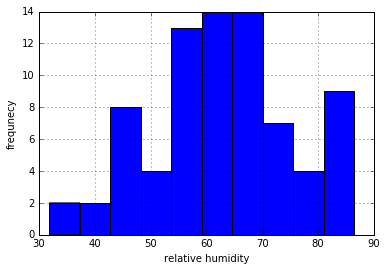

In [46]:
#속성 변수 하나 선택하여 histogram 찍어보기
weather['relative humidity'].hist()
plt.xlabel("relative humidity")
plt.ylabel("frequnecy")
plt.show()

In [47]:
#데이터 속성과 타겟 속성 분리
array = weather.values
data = array[:,0:-1]
target = array[:, -1]

In [48]:
#훈련 데이터 75%, 테스트 데이터 25% 로 분리
x_train, x_test, y_train, y_test = \
train_test_split(data, \
                target, test_size=0.25, random_state=33)

In [49]:
#LinearRegression 으로 모델 설계 및 fitting
model = LinearRegression()
model_fit = model.fit(x_train, y_train)
predicted_vals = model_fit.predict(x_test)

In [50]:
#예측값
mean_abs_error = (np.abs(((y_test - predicted_vals/y_test)\
                          *100)).mean())
print("MAE: %.2f%%" % (mean_abs_error))

MAE: 322.64%


In [51]:
# OLS 모델 설계 후 fitting and Summary
weather_constant = sm.add_constant(weather)
estimator = sm.OLS(weather_constant.ix[:, -1], weather_constant.ix\
                  [:, 1:-1])
result_ = estimator.fit()
print(result_.summary())

                            OLS Regression Results                            
Dep. Variable:      consecutive buddy   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     475.6
Date:                Mon, 12 Dec 2016   Prob (F-statistic):           3.07e-55
Time:                        17:44:47   Log-Likelihood:                -75.358
No. Observations:                  77   AIC:                             162.7
Df Residuals:                      71   BIC:                             176.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
fog                       

In [52]:
#유의미한 속성 제외하고 드랍 후 데이터 속성과 타겟 속성 분리
weather2 = weather.drop(['fog', 'rain', 'mean temperature'],axis=1)
array2 = weather2.values
data2 = array2[:, :-1]
target2 = array2[:, -1]

In [53]:
#테스트 데이터 75% 훈련 데이터 25% 분리
x_train2, x_test2, y_train2, y_test2 = \
train_test_split(data2, \
                target2, test_size=0.25, random_state=33)

In [54]:
#2번째 모델 설계
model2 = LinearRegression()
model2_fit = model2.fit(x_train2, y_train2)
predicted_vals2 = model2_fit.predict(x_test2)

In [55]:
#2번째 모델 예측율
mean_abs_error2 = (np.abs(((y_test2 - predicted_vals2/y_test2)\
                          *100)).mean())
print("MAE: %.2f%%" % (mean_abs_error2))

MAE: 322.86%


In [56]:
#2번째 모델 OLS fitting and Summary
weather_constant2 = sm.add_constant(weather2)
estimator2 = sm.OLS(weather_constant2.ix[:, -1], weather_constant2.ix\
                  [:, 1:-1])
result2_ = estimator2.fit()
print(result2_.summary())

                            OLS Regression Results                            
Dep. Variable:      consecutive buddy   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     925.4
Date:                Mon, 12 Dec 2016   Prob (F-statistic):           1.47e-58
Time:                        17:44:47   Log-Likelihood:                -77.948
No. Observations:                  77   AIC:                             161.9
Df Residuals:                      74   BIC:                             168.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
amount of precipitation   

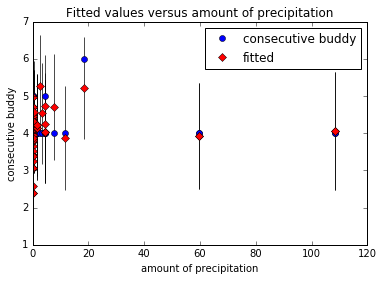

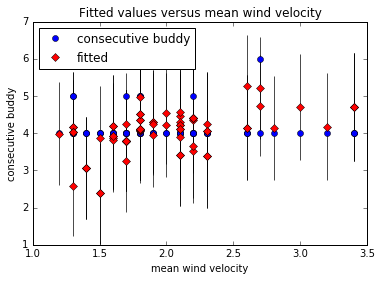

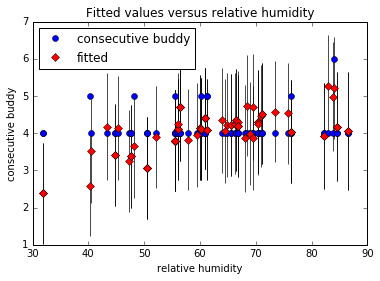

In [57]:
#1번째 모델의 원본 데이터 대비 fitting 데이터 비교
sm.graphics.plot_fit(result_,"amount of precipitation")
sm.graphics.plot_fit(result_,"mean wind velocity")
sm.graphics.plot_fit(result_,"relative humidity")
plt.show()

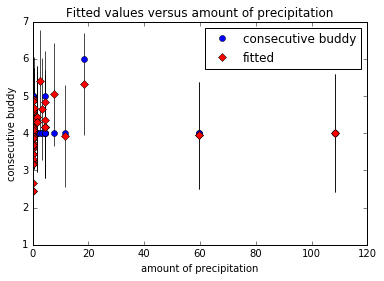

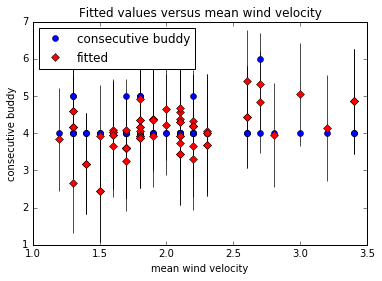

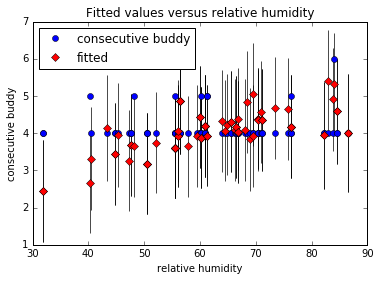

In [58]:
#2번째 모델의 원본 데이터 대비 fitting 데이터 비교
sm.graphics.plot_fit(result2_,"amount of precipitation")
sm.graphics.plot_fit(result2_,"mean wind velocity")
sm.graphics.plot_fit(result2_,"relative humidity")
plt.show()

In [66]:
#1번째 모델 예측
predict = result_.predict([2, 2, 18.5, 19, 2.7, 84.1])
print(predict)

[ 5.20628167]


In [67]:
#2번째 모델 예측
predict2 = result2_.predict([18.5, 2.7, 84.1])
print(predict2)

[ 5.3246032]


In [71]:
#1번째 모델 예측
predict = result_.predict([2, 2, 108.5, 24.0, 2.3, 83.5])
print(predict)

[ 3.93461989]


In [70]:
#2번째 모델 예측
predict2 = result2_.predict([108.5, 2.3, 83.5])
print(predict2)

[ 3.86958361]
